In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns

In [5]:
filename_ts = r'C:\Users\miao\Desktop\DataWhale\task2\data.csv'
df=pd.read_csv(filename_ts,encoding='gbk')
print(df.columns)
df.head(5)

Index(['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no',
       'low_volume_percent', 'middle_volume_percent',
       'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'regional_mobility', 'student_feature',
       'repayment_capability', 'is_high_user', 'number_of_trans_from_2011',
       'first_transaction_time', 'historical_trans_amount',
       'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month',
       'avg_consume_less_12_valid_month', 'abs',
       'top_trans_count_last_1_month', 'avg_price_last_12_month',
       'avg_price_top_last_12_valid_month', 'reg_preference_for_trad',
       'trans_top_time_last_1_month', 'trans_top_time_last_6_month',
       'consume_top_time_last_1_month', 'consume_top_time_last_6_month',
       'cross_consume_count_last_1_month',
       'trans_fail_top_count_enum_last_1_mont

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


0    3561
1    1193
Name: status, dtype: int64


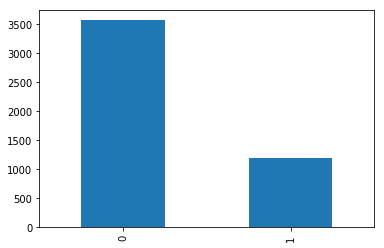

In [7]:
#查看标签列 status的分布均衡性(处理前)
print(df['status'].value_counts())
df['status'].value_counts().plot(kind='bar')

In [13]:
#student_feature缺失太多直接丢弃,其他没有业务价值
drop_columns=['bank_card_no','source','id_name','Unnamed: 0','custid','student_feature','trade_no']
df.drop(drop_columns,axis=1,inplace=True)

#日期处理为日期格式datetime，并生成新的一列 loans_time
df['latest_query_time']=pd.to_datetime(df['latest_query_time'])
df['loans_latest_time']=pd.to_datetime(df['loans_latest_time'])

#将timedelta格式转化为float类型(秒)
df['loans_time']=df['loans_latest_time']-df['latest_query_time']
df['loans_time']=df['loans_time'].dt.total_seconds().dropna()

#两列日期格式数据处理直接丢弃
datatime_data=['loans_latest_time','latest_query_time']
df.drop(datatime_data,axis=1,inplace=True)

#将城市进行数值化
map_dict={'一线城市':1,'二线城市':2,'三线城市':3,'境外':4,'其他':0}
df['reg_preference_for_trad']=df['reg_preference_for_trad'].map(map_dict)
df.head()

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,loans_time
0,0.01,0.99,0,0.90,0.55,0.313,17.0,27.0,26.0,3.0,...,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0,-518400.0
1,0.02,0.94,2000,1.28,1.00,0.458,19.0,30.0,14.0,4.0,...,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0,172800.0
2,0.04,0.96,0,1.00,1.00,0.114,13.0,68.0,22.0,1.0,...,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0,-345600.0
3,0.00,0.96,2000,0.13,0.57,0.777,22.0,14.0,6.0,3.0,...,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0,-172800.0
4,0.01,0.99,0,0.46,1.00,0.175,13.0,66.0,42.0,1.0,...,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0,-8467200.0


In [16]:
#统计缺失值
print('缺失值:','\n',df.isnull().sum())

缺失值: 
 low_volume_percent                          2
middle_volume_percent                       2
take_amount_in_later_12_month_highest       0
trans_amount_increase_rate_lately           3
trans_activity_month                        2
trans_activity_day                          2
transd_mcc                                  2
trans_days_interval_filter                  8
trans_days_interval                         2
regional_mobility                           2
repayment_capability                        0
is_high_user                                0
number_of_trans_from_2011                   2
first_transaction_time                      2
historical_trans_amount                     0
historical_trans_day                        2
rank_trad_1_month                           2
trans_amount_3_month                        0
avg_consume_less_12_valid_month             2
abs                                         0
top_trans_count_last_1_month                2
avg_price_last_12_month    

In [18]:
#动作1：数量较小，直接丢弃
# df.dropna(inplace=True)

#动作2：缺失值以中位值进行填充
from sklearn.preprocessing import Imputer
columns=list(df)
imp=Imputer(missing_values=np.nan,strategy='median')
df=imp.fit_transform(df)
print('number after processing:',df.shape)
df=pd.DataFrame(df,columns=columns)

#再次统计缺失值
print('缺失值:','\n',(df.isnull().sum()))
df.head()

number after processing: (4754, 82)
缺失值: 
 low_volume_percent                        0
middle_volume_percent                     0
take_amount_in_later_12_month_highest     0
trans_amount_increase_rate_lately         0
trans_activity_month                      0
trans_activity_day                        0
transd_mcc                                0
trans_days_interval_filter                0
trans_days_interval                       0
regional_mobility                         0
repayment_capability                      0
is_high_user                              0
number_of_trans_from_2011                 0
first_transaction_time                    0
historical_trans_amount                   0
historical_trans_day                      0
rank_trad_1_month                         0
trans_amount_3_month                      0
avg_consume_less_12_valid_month           0
abs                                       0
top_trans_count_last_1_month              0
avg_price_last_12_month          

d:\programdata\python36\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,loans_time
0,0.01,0.99,0.0,0.90,0.55,0.313,17.0,27.0,26.0,3.0,...,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0,-518400.0
1,0.02,0.94,2000.0,1.28,1.00,0.458,19.0,30.0,14.0,4.0,...,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0,172800.0
2,0.04,0.96,0.0,1.00,1.00,0.114,13.0,68.0,22.0,1.0,...,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0,-345600.0
3,0.00,0.96,2000.0,0.13,0.57,0.777,22.0,14.0,6.0,3.0,...,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0,-172800.0
4,0.01,0.99,0.0,0.46,1.00,0.175,13.0,66.0,42.0,1.0,...,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0,-8467200.0


In [19]:
#丢掉方差为0即没有变化的列
df.drop(df.columns[df.std()==0],axis=1,inplace=True)
df.shape

(4754, 82)

0.0    3561
1.0    1193
Name: status, dtype: int64


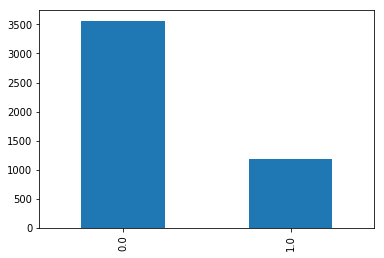

In [20]:
#查看标签列 status的分布均衡性(处理后)
print(df['status'].value_counts())
df['status'].value_counts().plot(kind='bar')

In [21]:
train_x=df.drop(['status'],axis=1)
train_y=df['status']

print(train_x.shape)
train_x.head()

(4754, 81)


,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,loans_time
0,0.01,0.99,0.0,0.90,0.55,0.313,17.0,27.0,26.0,3.0,...,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0,-518400.0
1,0.02,0.94,2000.0,1.28,1.00,0.458,19.0,30.0,14.0,4.0,...,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0,172800.0
2,0.04,0.96,0.0,1.00,1.00,0.114,13.0,68.0,22.0,1.0,...,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0,-345600.0
3,0.00,0.96,2000.0,0.13,0.57,0.777,22.0,14.0,6.0,3.0,...,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0,-172800.0
4,0.01,0.99,0.0,0.46,1.00,0.175,13.0,66.0,42.0,1.0,...,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0,-8467200.0


In [22]:
#拆分测试集和训练集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.3,random_state=2018)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(3327, 81)
(1427, 81)
(1427,)


In [23]:
#引入模型进行训练
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [ ]:

#定义计算iv值的函数
def calc_iv(df, feature, target, pr=False):
    """
    Set pr=True to enable printing of output.

    Output:
      * iv: float,
      * data: pandas.DataFrame
    """
    lst = []
    df[feature] = df[feature].fillna('NULL')

    for i in range(df[feature].nunique()):  # nuinque()是查看该序列(axis=0/1对应着列或行)的不同值的数量个数
        val = list(df[feature].unique())[i]
        lst.append([feature,
                    val,  # Value
                    df[df[feature] == val].count()[feature],  # all
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # good rate
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]])  # bad rate
    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print("IV = ", data['IV'].sum())

    iv = data['IV'].sum()

    return iv, data

column_headers = list(df.columns.values)
# print(column_headers)

d=[]
for x in column_headers:
    IV_1, data = calc_iv(df, x, 'status')
    d.append(IV_1)
#整理成Series类型并合并
column_headers=pd.Series(column_headers,name='feature')
d=pd.Series(d,name='iv_value')

# print(column_headers)
iv_result=pd.concat([column_headers,d],axis=1)
iv_result.sort_values(by='iv_value',ascending=False)

# print('{}： {}'.format(x, IV_1))

In [ ]:
#筛选IV值大于0.02的作为有效可预测列
iv_below=iv_result[iv_result['iv_value']<0.02]
deleted_cols_by_iv=list(iv_below.feature)
deleted_cols_by_iv.remove('status')

In [ ]:
x_train.drop(deleted_cols_by_iv,axis=1,inplace=True)
x_test.drop(deleted_cols_by_iv,axis=1,inplace=True)

In [ ]:
# 此时选择将x_train进行标准化
from sklearn.preprocessing import StandardScaler
columns=list(x_train)
x_train=StandardScaler().fit_transform(x_train)
x_train=pd.DataFrame(x_train,columns=columns)

x_test=StandardScaler().fit_transform(x_test)
x_test=pd.DataFrame(x_test,columns=columns)

In [ ]:
#定义返回y_pred和y_pred_proba的函数，并能打印训练集和测试集的精度以及ROC曲线面积
def model_metrics(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train,y_train)
    # 预测
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    y_train_proba = clf.predict_proba(X_train)[:,1]
    y_test_proba = clf.predict_proba(X_test)[:,1]
    
    # 准确率
    print('[准确率]', end = ' ')
    print('训练集：', '%.4f'%accuracy_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%accuracy_score(y_test, y_test_pred))
    
#     auc取值：用roc_auc_score或auc
    print('[auc值]', end = ' ')
    print('训练集：', '%.4f'%roc_auc_score(y_train, y_train_proba), end = ' ')
    print('测试集：', '%.4f'%roc_auc_score(y_test, y_test_proba))
    
    #加上return方便后续计算混淆矩阵效果
    return y_test_proba,y_test_pred

In [ ]:
#调入随机森林模型，无调参之前看下分数
rf=RandomForestClassifier()

model_metrics(rf,x_train,x_test,y_train,y_test)

In [39]:
feature_importance=sorted(zip(rf.feature_importances_,list(x_train)),reverse=True)
feature_importance,len(feature_importance)

([(0.06174381526322329, 'trans_fail_top_count_enum_last_1_month'),
  (0.04504832257482873, 'history_fail_fee'),
  (0.035468197398277626, 'loans_overdue_count'),
  (0.032105179818621585, 'loans_score'),
  (0.02859716084970341, 'apply_score'),
  (0.019541879207921872, 'trans_amount_3_month'),
  (0.01915921241427944, 'history_suc_fee'),
  (0.018792831624151025, 'latest_one_month_fail'),
  (0.01861735455762392, 'avg_price_last_12_month'),
  (0.018274499891462265, 'max_cumulative_consume_later_1_month'),
  (0.018213107443559133, 'consfin_credit_limit'),
  (0.017657970373901214, 'pawns_auctions_trusts_consume_last_6_month'),
  (0.017656615486180673, 'abs'),
  (0.017099118733976855, 'loans_long_time'),
  (0.01697500730572827, 'consfin_avg_limit'),
  (0.016896621675845405, 'trans_fail_top_count_enum_last_12_month'),
  (0.01688127165497073, 'latest_query_day'),
  (0.01666351123333832, 'trans_activity_day'),
  (0.01645426825443038, 'trans_top_time_last_6_month'),
  (0.01639891654175838, 'loans_t

In [41]:
x_train.head(2)

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,repayment_capability,...,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,loans_time
0,-0.291017,0.610479,0.499187,-0.021817,0.983413,0.238468,-0.322422,0.001348,0.385087,-0.026841,...,0.046929,0.214578,0.338205,0.809769,0.551295,-0.024303,0.054607,-0.646478,-0.867756,0.379832
1,0.191762,0.470992,-0.351729,-0.021926,0.983413,-0.937386,0.123513,-0.088364,0.324197,-0.065450,...,-0.031812,1.024701,0.116722,0.114696,-0.057150,0.410648,-0.142723,0.183842,-0.523012,0.594848


In [43]:
#按照排序,使用前30列为有用列,其他为无用列
useless=[]
for feature in x_train.columns:
    if feature in [t[1] for t in feature_importance[30:]]:
        useless.append(feature)
x_train.drop(useless,axis=1,inplace=True)
x_test.drop(useless,axis=1,inplace=True)
x_train.shape

(3327, 30)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,roc_curve

lr_model = LogisticRegression()
svm_model = svm.SVC(probability=True)
dt_model = DecisionTreeClassifier()
xgb_model = XGBClassifier()
knn_model=KNeighborsClassifier()
gbdt_model=GradientBoostingClassifier(n_estimators=100)
rf_model=RandomForestClassifier(n_estimators=100)


models={'LR':lr_model,'svm':svm_model,'knn':knn_model,'decision tree':dt_model,
        'xgboost':xgb_model,'gbt':gbdt_model,'random forest':rf_model}

In [47]:
df_result=pd.DataFrame(columns=['model','accuracy','precision','recall','f1_score','roc_auc_score'])

In [ ]:
定义评价函数,根据y_pred和y_test返回acc,p,r和f1值
def evaluate(y_pred,y_test):
    acc=accuracy_score(y_test,y_pred)
    p=precision_score(y_test,y_pred)
    r=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)

    return acc,p,r,f1

#进一步每个模型model进行迭代,并将df_result进行填充,并计算auc值
row=0  
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_proba=model.predict_proba(x_test)[:,1]
    acc,p,r,f1=evaluate(y_pred,y_test)
    auc=roc_auc_score(y_test,y_pred_proba)
    df_result.loc[row]=[name,acc,p,r,f1,auc]
    row+=1
    
df_result

In [ ]:
from xgboost.sklearn import XGBClassifier
xgb=XGBClassifier()

In [ ]:
#引入混淆矩阵对分类的结果进行可视化
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cnf_xgb=confusion_matrix(y_test,model_metrics(xgb,x_train,x_test,y_train,y_test)[1])
class_names=[0,1]
plot_confusion_matrix(cnf_xgb,class_names)